In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [11]:
recovery = pd.read_csv('recovery-data/recovery-data.csv', index_col = 'Time')
recovery.shape

(91683, 36)

In [12]:
combined = recovery.drop_duplicates().sort_index().reset_index()
combined.shape

(91683, 37)

In [13]:
t0 = 2280.2 # time of ignition [s]
duration = 35 #32 # flight duration [s]
g = -9.81 # correct for gravity
combined['Time [s]'] = (combined['Time'])/1000 - t0
combined['Acceleration 1 [g]'] = (combined['Ay_IMU1'] / g)
combined['Acceleration 2 [g]'] = (combined['Ay_IMU2'] / g)
combined['Temperature [°C]'] = combined['T_SHT']
combined['Humidity [%]'] = combined['H_SHT']
#combined['Battery [V]'] = combined['battery_battery']/1000
combined['Pressure 1 [kPa]'] = combined['P_BARO1']/1000
combined['Pressure 2 [kPa]'] = combined['P_BARO2']/1000

Max acceleration: 7.007135575942915 g
Min acceleration: -1.63914373088685 g


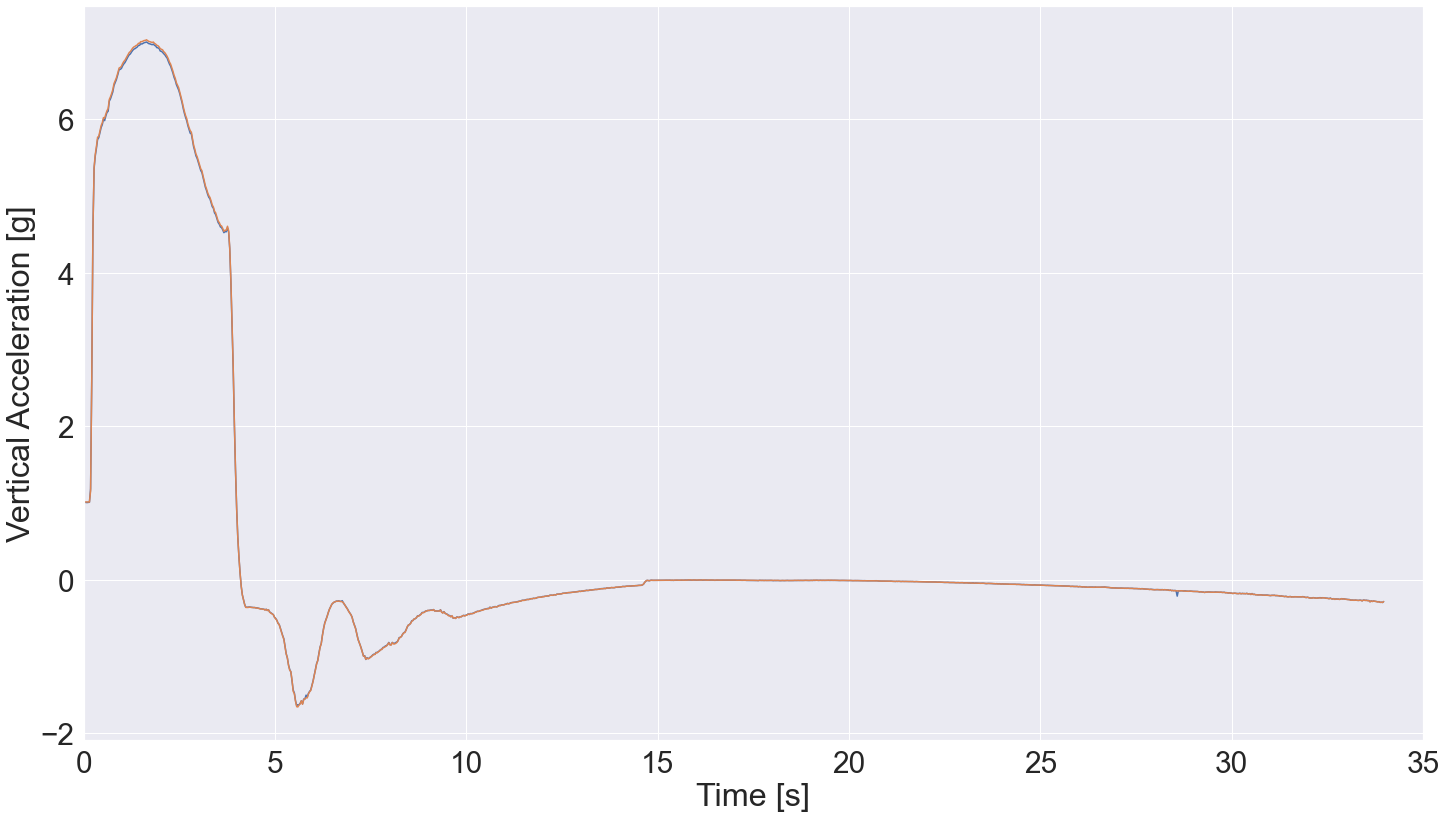

In [14]:
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Acceleration 1 [g]')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Acceleration 2 [g]')
plt.set_ylabel('Vertical Acceleration [g]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)
print(f"Max acceleration: {np.max(combined['Acceleration 1 [g]'])} g")
print(f"Min acceleration: {np.min(combined['Acceleration 1 [g]'])} g")

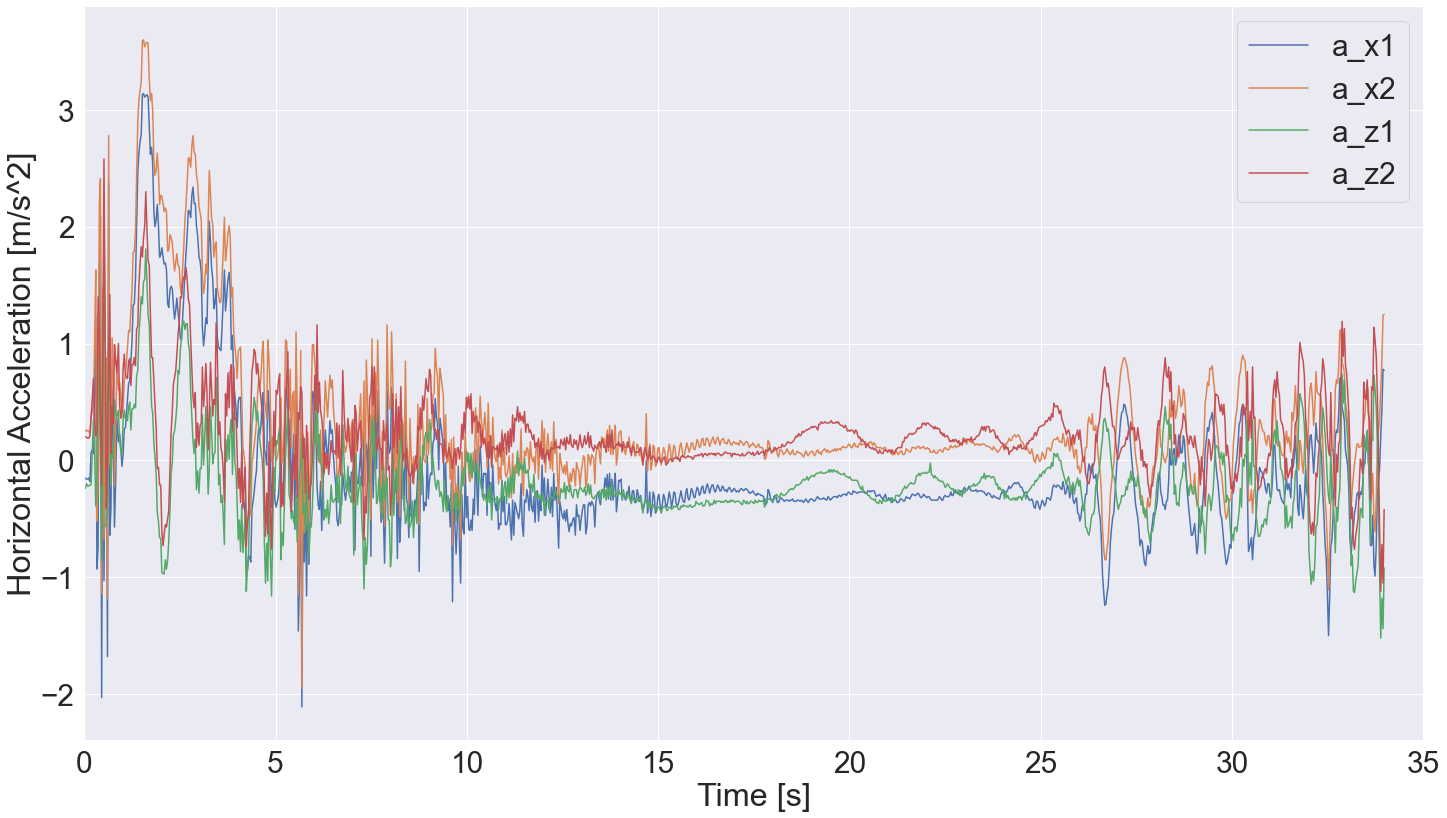

In [16]:
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Ax_IMU1', label='a_x1')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Ax_IMU2', label='a_x2')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Az_IMU1', label='a_z1')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Az_IMU2', label='a_z2')
plt.set_ylabel('Horizontal Acceleration [m/s^2]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)
plt.legend(loc='upper right')

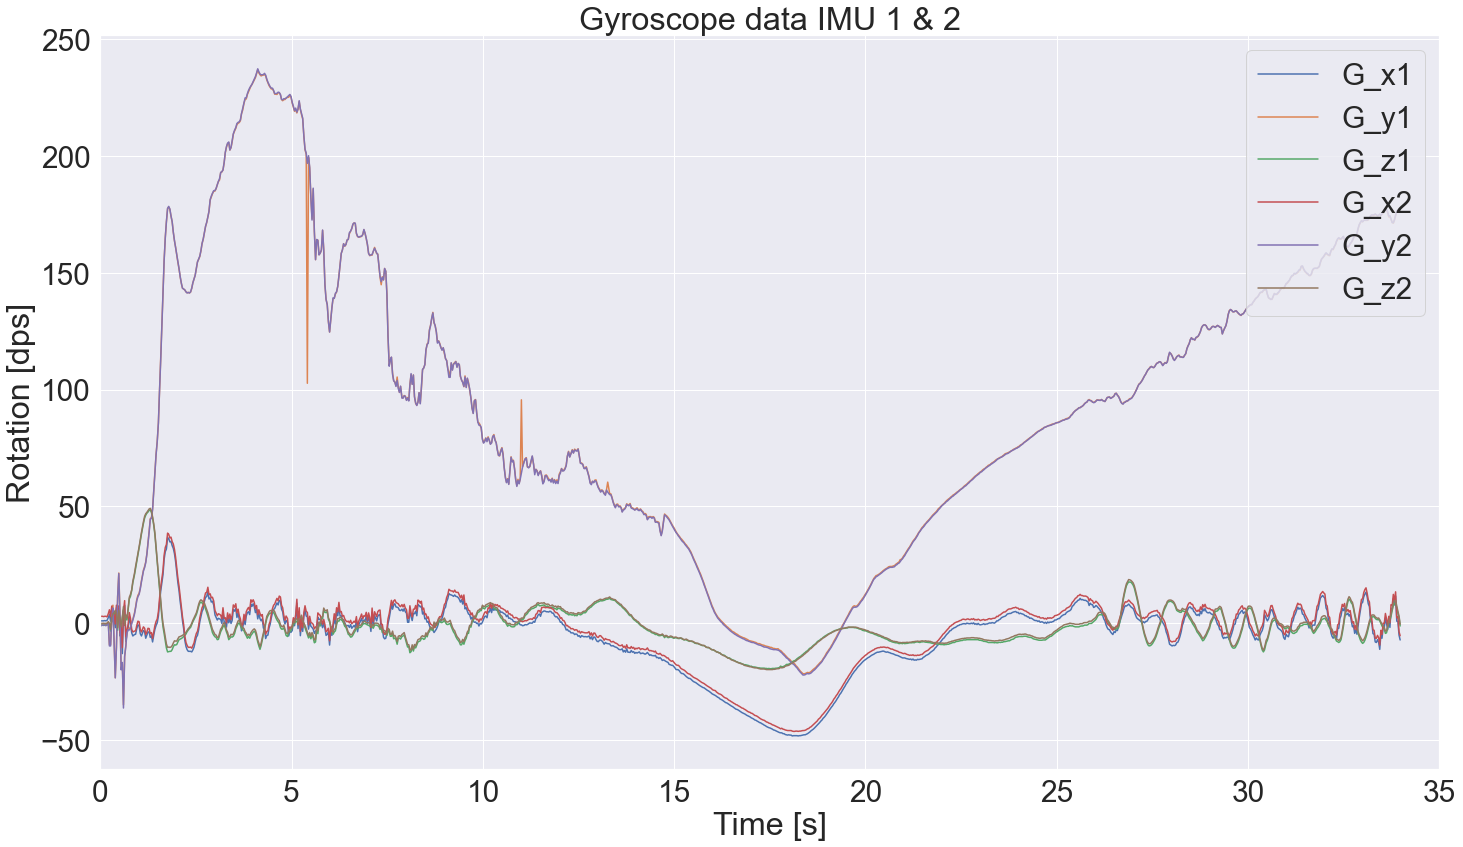

In [17]:
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Gx_IMU1', label='G_x1')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Gy_IMU1', label='G_y1')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Gz_IMU1', label='G_z1')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Gx_IMU2', label='G_x2')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Gy_IMU2', label='G_y2')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'Gz_IMU2', label='G_z2')
plt.set_title(f'Gyroscope data IMU 1 & 2')
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)
plt.legend(loc='upper right')

(0.0, 35.0)

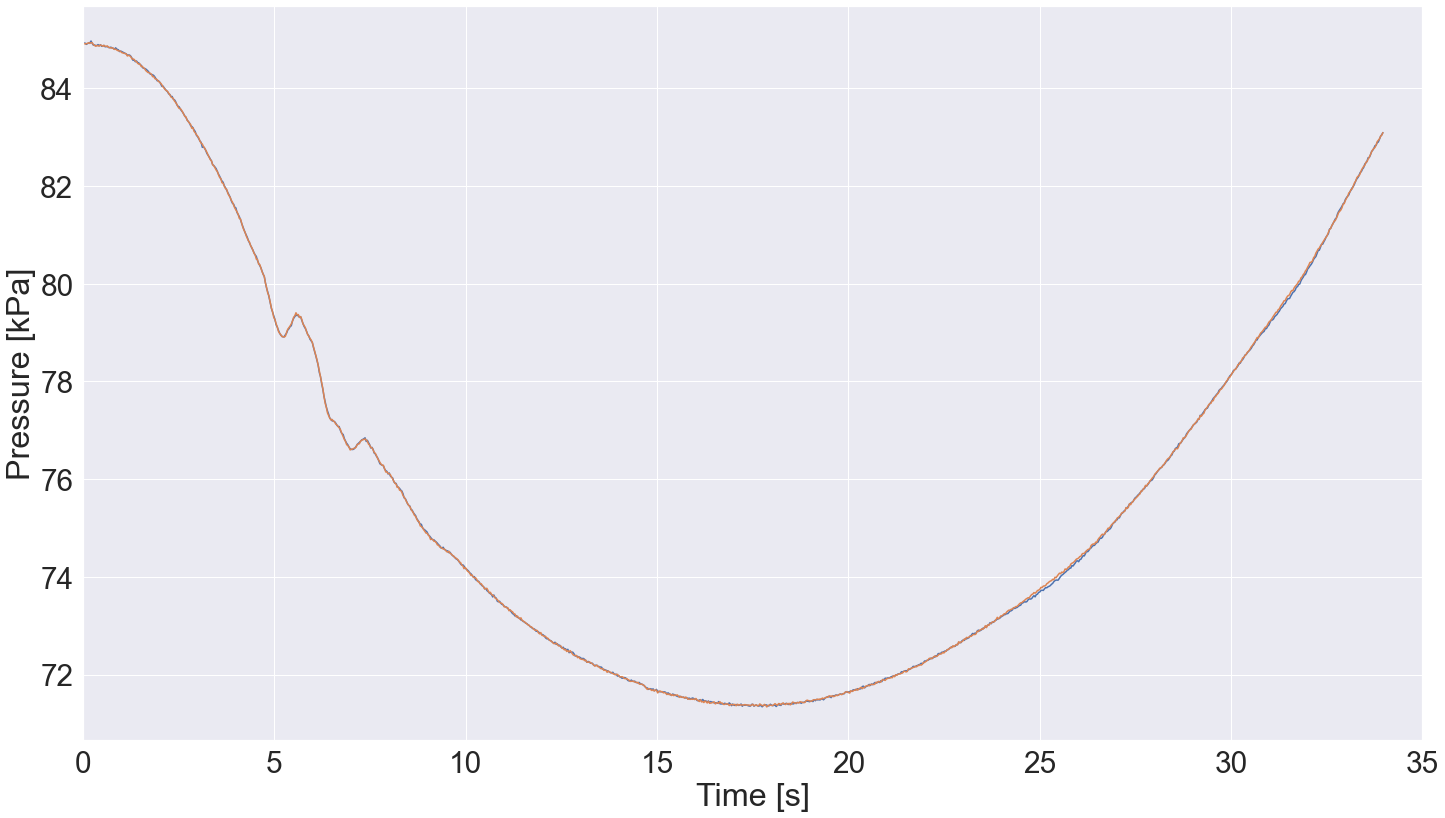

In [18]:
#plt = sns.scatterplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure [kPa]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure 1 [kPa]')
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Pressure 2 [kPa]')
plt.set_ylabel('Pressure [kPa]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

(0.0, 35.0)

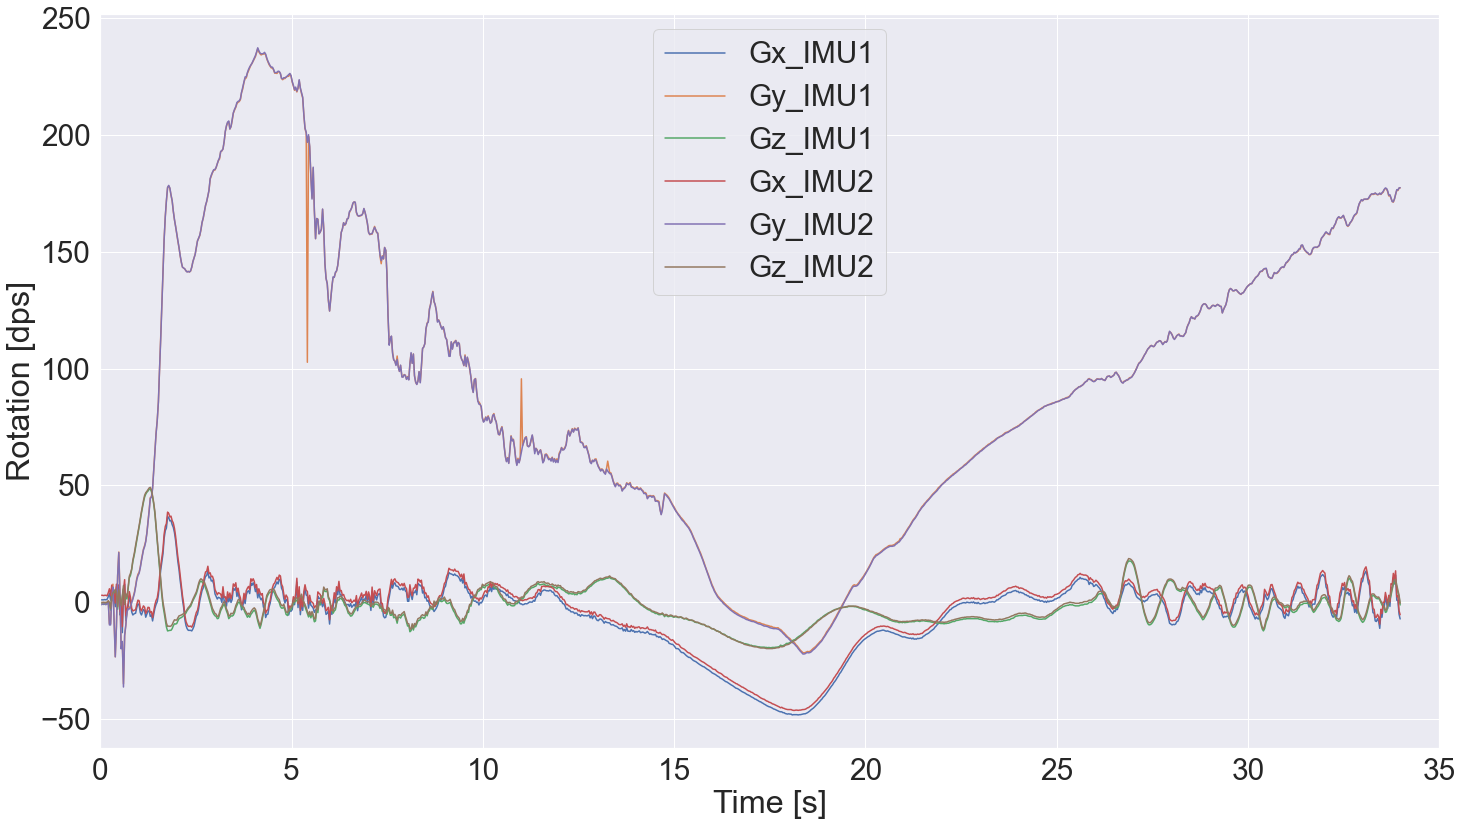

In [23]:
labels = ['Gx_IMU1','Gy_IMU1','Gz_IMU1','Gx_IMU2','Gy_IMU2','Gz_IMU2']
for label in labels:
    plt = sns.lineplot(data = combined, x = 'Time [s]', y = label, label=label)
plt.set_ylabel('Rotation [dps]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

(0.0, 35.0)

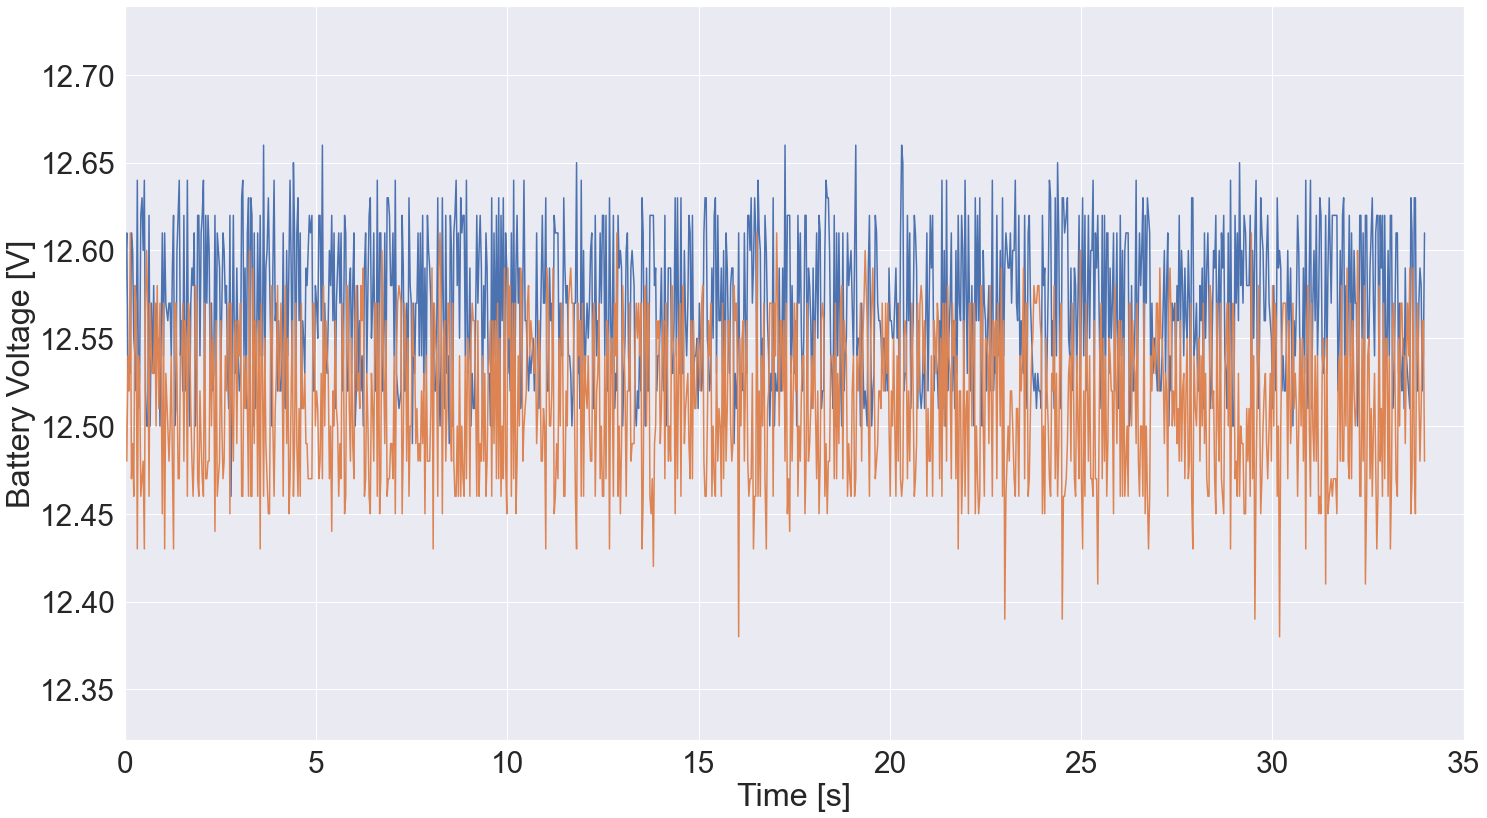

In [20]:
#plt = sns.scatterplot(data = combined, x = 'Time [s]', y = 'Battery [V]', color = 'black', edgecolor='gray')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'V_BAT1')
plt = sns.lineplot(data = combined, x = 'Time [s]', y = 'V_BAT2')
plt.set_ylabel('Battery Voltage [V]')
plt.set_xlabel('Time [s]')
#plt.set_ylim(-1, 2)
plt.set_xlim(0, duration)

Max humidity: 44.01%
Min humidity: 29.35%


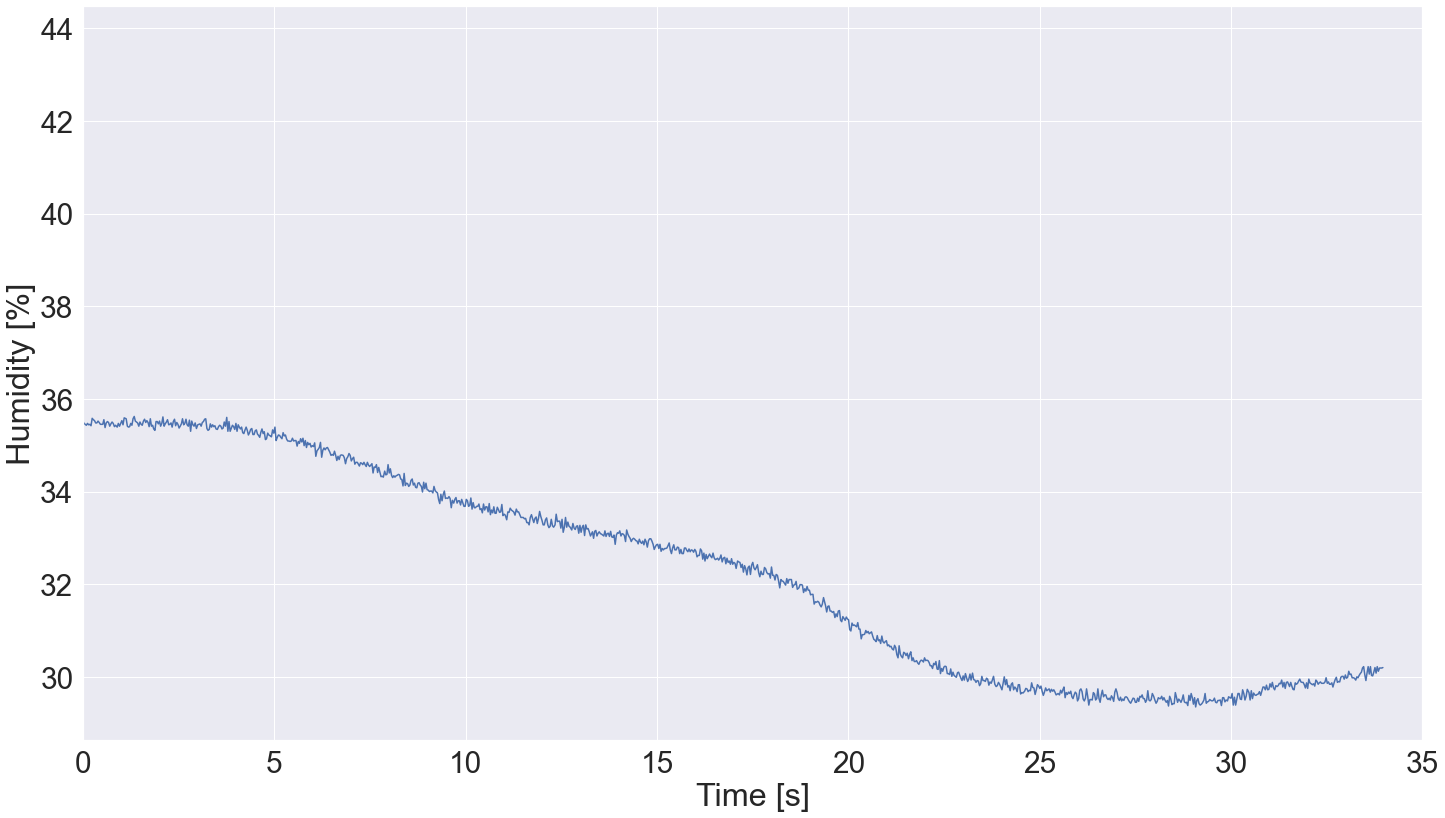

In [21]:
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Humidity [%]')
plt.set_ylabel('Humidity [%]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

print(f"Max humidity: {np.max(combined['Humidity [%]'])}%")
print(f"Min humidity: {np.min(combined['Humidity [%]'])}%")

Max temperature: 27.26 °C
Min temperature: 22.07 °C


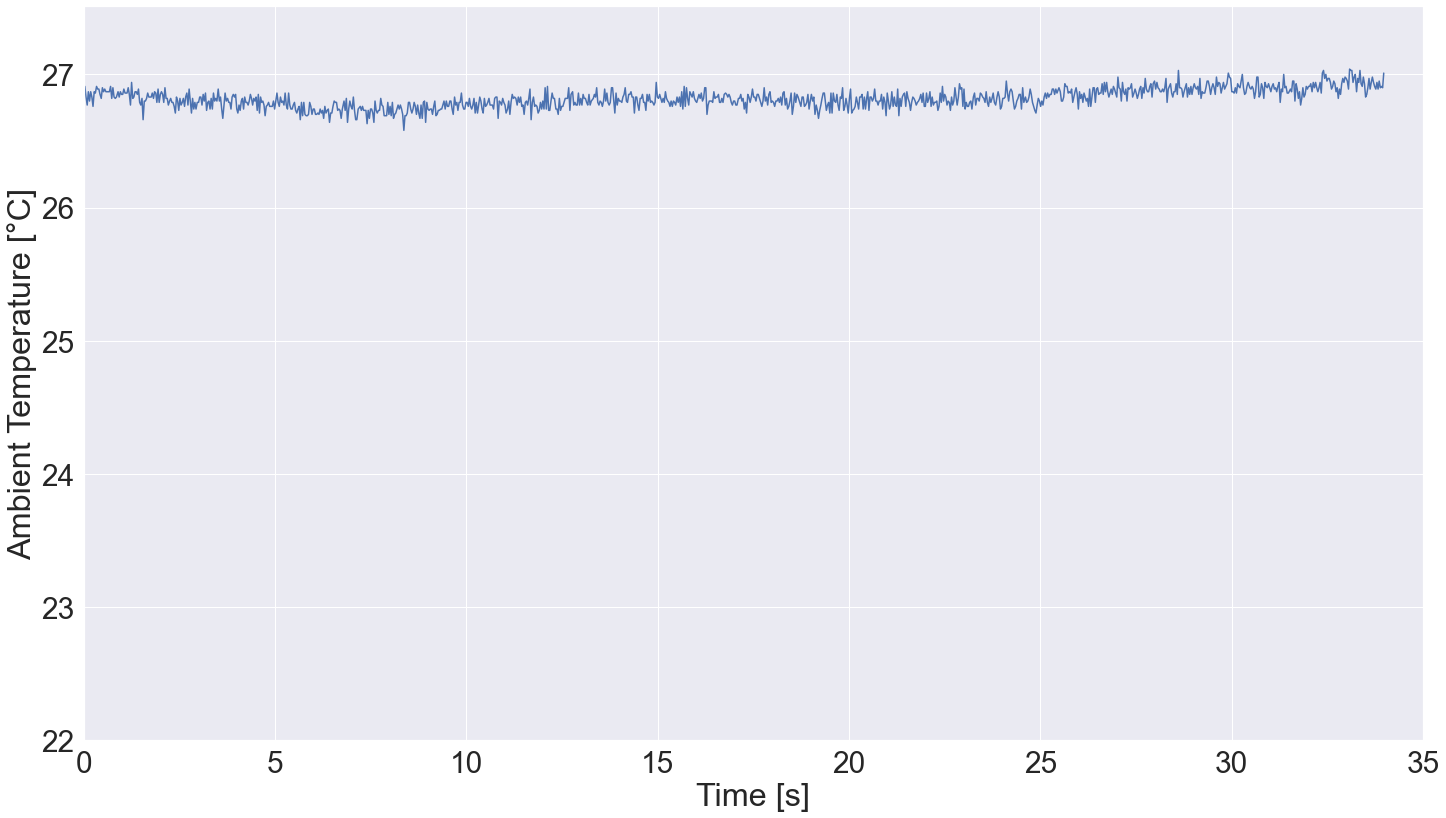

In [22]:
plt = sns.lineplot(data = combined.reset_index(), x = 'Time [s]', y = 'Temperature [°C]')
plt.set_ylabel('Ambient Temperature [°C]')
plt.set_xlabel('Time [s]')
plt.set_xlim(0, duration)

print(f"Max temperature: {np.max(combined['Temperature [°C]'])} °C")
print(f"Min temperature: {np.min(combined['Temperature [°C]'])} °C")